In [4]:
import numpy as np              # For numerical operations and array manipulations
import pandas as pd            # For data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns           # Statistical data visualization
import math
np.random.seed(42)
%matplotlib inline

## Sample linear function and data points

In [32]:
def func(x):
    return 5 * x - 3

def get_loss(x_train, y_train, w, b):
    y_pred = w * x_train + b
    mse_loss = (np.sum((y_train - y_pred) ** 2)) / (2 * len(x_train))
    return mse_loss

def get_grad(x_train, y_train, w, b):
    return np.array([
        -np.sum((y_train - w * x_train - b) * x_train) / len(x_train),
        -np.sum(y_train - w * x_train - b) / len(x_train)
    ])

In [17]:
x_train = np.random.randn(1000)
x_train.shape

(1000,)

In [18]:
y_train = func(x_train)
# add some noise
y_train += np.random.randn(1000)
y_train.shape

(1000,)

In [21]:
def plot_function_and_data_points(func, x_train, y_train, x_start=-3, x_end=3, num_points=1000):
    # Generate x values
    x = np.linspace(x_start, x_end, num_points)
    
    # Calculate corresponding y values
    y = func(x)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plot gradient descent points and connections
    plt.scatter(x_train, y_train, c='red', s=20, label='Train data')

    
    # Add title and labels
    plt.title('Plot of f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    # Add vertical and horizontal lines for axes
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

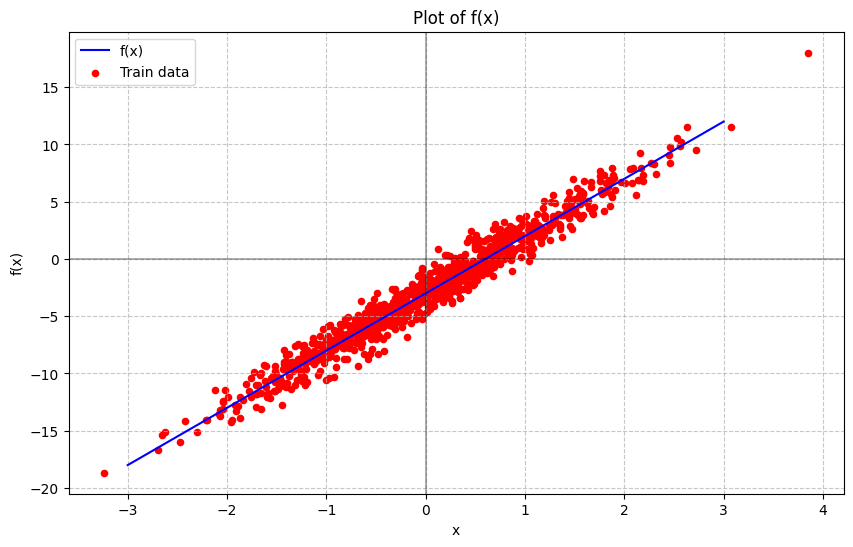

In [22]:
plot_function_and_data_points(func, x_train, y_train)

In [37]:
def plot_loss_surface(x_train, y_train, get_loss, w_range=(-10, 10), b_range=(-10, 10), num_points=1000):
    """
    Create a 3D surface plot of the loss function

    Parameters:
    -----------
    get_loss : callable
        Function that takes weight and bias as input and returns MSE loss
    w_range : tuple
        Range for weight (min, max)
    b_range : tuple
        Range for bias (min, max)
    num_points : int
        Number of points to sample in each dimension
    """
    # Create grid of w and b values
    w = np.linspace(w_range[0], w_range[1], num_points)
    b = np.linspace(b_range[0], b_range[1], num_points)
    W, B = np.meshgrid(w, b)

    # Calculate loss for each combination of w and b
    Z = np.zeros_like(W)
    for i in range(num_points):
        for j in range(num_points):
            Z[i,j] = get_loss(x_train, y_train, W[i,j], B[i,j])

    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surface = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

    # Add contour plot projection on xy-plane
    offset = Z.min()
    ax.contour(W, B, Z, zdir='z', offset=offset, levels=20, cmap='viridis', alpha=0.5)

    # Customize the plot
    ax.set_xlabel('Weight (w)')
    ax.set_ylabel('Bias (b)')
    ax.set_zlabel('Loss (MSE)')
    ax.set_title('Loss Surface for Linear Regression')

    # Add colorbar
    fig.colorbar(surface, ax=ax, label='Loss Value')

    plt.show()

In [38]:
def plot_loss_contour(x_train, y_train, get_loss, w_range=(-10, 10), b_range=(-10, 10), num_points=1000):
    """
    Create a contour plot of the loss function
    """
    # Create grid of w and b values
    w = np.linspace(w_range[0], w_range[1], num_points)
    b = np.linspace(b_range[0], b_range[1], num_points)
    W, B = np.meshgrid(w, b)

    # Calculate loss for each combination of w and b
    Z = np.zeros_like(W)
    for i in range(num_points):
        for j in range(num_points):
            Z[i,j] = get_loss(x_train, y_train, W[i,j], B[i,j])

    # Create contour plot
    plt.figure(figsize=(10, 8))
    plt.contour(W, B, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Loss Value')

    # Add labels and title
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Loss Contours for Linear Regression')

    # Add grid
    plt.grid(True, alpha=0.3)
    plt.show()

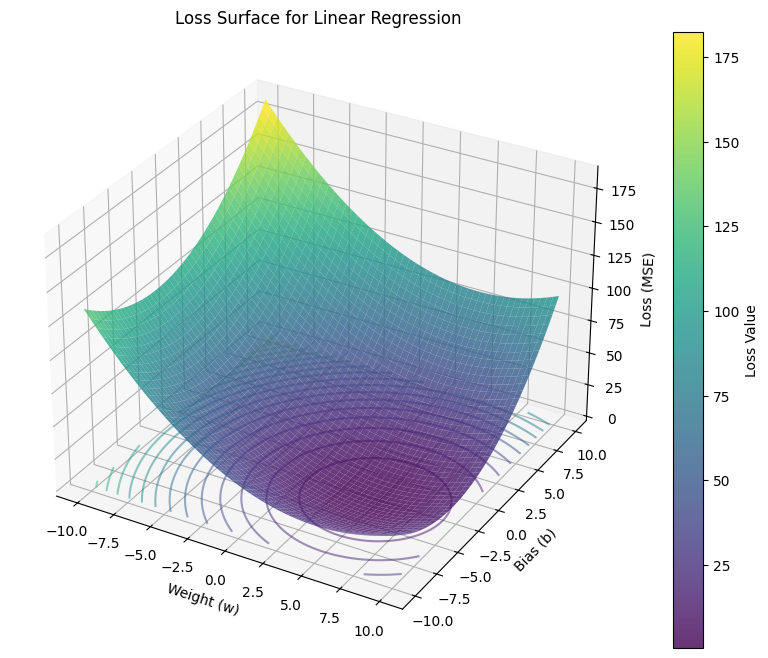

In [39]:
plot_loss_surface(x_train, y_train, get_loss)

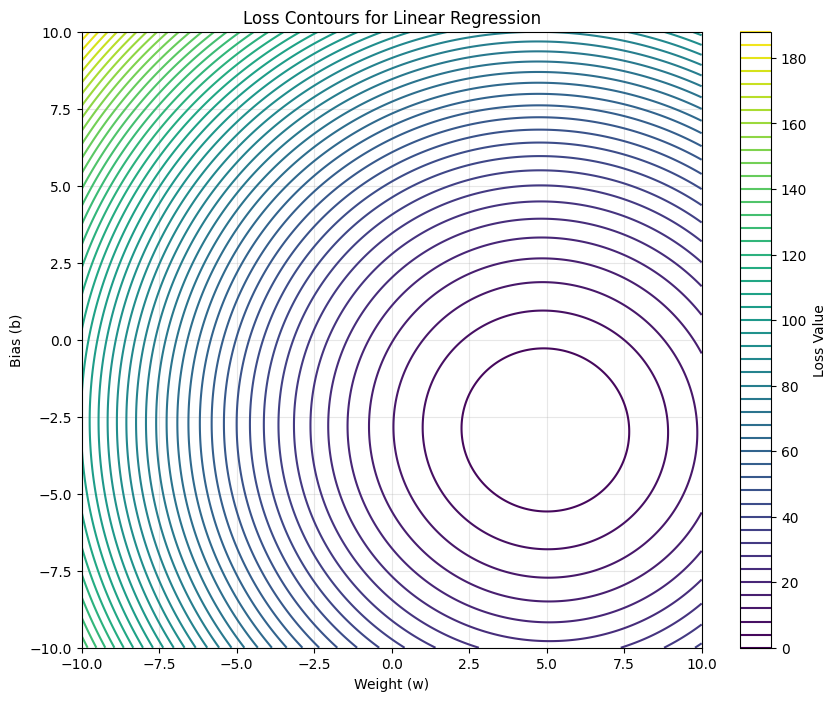

In [40]:
plot_loss_contour(x_train, y_train, get_loss)

## Next implement a training loop

In [41]:
params = np.random.randn(2)
w_og, b_og = params
w_og, b_og

(np.float64(-0.7924199209999613), np.float64(-0.3079615296390403))

In [58]:
def train(x_train, y_train, w, b, n_epoch, grad_descent_class):
    loss_values, w_updates, b_updates = [], [], []

    for epoch in range(n_epoch):
        w_updates.append(w)
        b_updates.append(b)
        # Get loss
        loss = get_loss(x_train, y_train, w, b)
        loss_values.append(loss)
        # Compute gradients
        grad = get_grad(x_train, y_train, w, b)
        # Do grad descent
        updated_params = grad_descent_class.update(np.array([w, b]), grad)
        w, b = updated_params[0], updated_params[1]

    return loss_values, w_updates, b_updates

In [79]:
def plot_loss_surface_with_path(x_train, y_train, get_loss, path_points, w_range=(-10, 10), b_range=(-10, 10), num_points=1000):
    """
    Create a 3D surface plot of the loss function with optimization path

    Parameters:
    -----------
    get_loss : callable
        Function that takes weight and bias as input and returns MSE loss
    path_points : list of tuples
        List of (w, b) points from optimization updates
    w_range, b_range : tuple
        Range for weight and bias (min, max)
    num_points : int
        Number of points to sample in each dimension
    """
    # Create grid of w and b values
    w = np.linspace(w_range[0], w_range[1], num_points)
    b = np.linspace(b_range[0], b_range[1], num_points)
    W, B = np.meshgrid(w, b)

    # Calculate loss surface
    Z = np.zeros_like(W)
    for i in range(num_points):
        for j in range(num_points):
            Z[i,j] = get_loss(x_train, y_train, W[i,j], B[i,j])

    # Create 3D plot
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surface = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.6)

    # Extract path coordinates
    path_w = [p[0] for p in path_points]
    path_b = [p[1] for p in path_points]
    path_loss = [get_loss(x_train, y_train, w, b) for w, b in path_points]

    # Plot optimization path
    ax.plot(path_w, path_b, path_loss, 'r.-', linewidth=2, markersize=8,
            label='Optimization Path')

    # Add start and end points
    ax.scatter(path_w[0], path_b[0], path_loss[0], color='green', s=100,
              label='Start')
    ax.scatter(path_w[-1], path_b[-1], path_loss[-1], color='red', s=100,
              label='End')

    # Customize the plot
    ax.set_xlabel('Weight (w)')
    ax.set_ylabel('Bias (b)')
    ax.set_zlabel('Loss (MSE)')
    ax.set_title('Loss Surface with Optimization Path')

    # Add colorbar and legend
    fig.colorbar(surface, ax=ax, label='Loss Value')
    ax.legend()

    plt.show()

def plot_loss_contour_with_path(x_train, y_train, get_loss, path_points, w_range=(-10, 10), b_range=(-10, 10), num_points=100):
    """
    Create a contour plot of the loss function with optimization path
    """
    # Create grid of w and b values
    w = np.linspace(w_range[0], w_range[1], num_points)
    b = np.linspace(b_range[0], b_range[1], num_points)
    W, B = np.meshgrid(w, b)

    # Calculate loss for each combination of w and b
    Z = np.zeros_like(W)
    for i in range(num_points):
        for j in range(num_points):
            Z[i,j] = get_loss(x_train, y_train, W[i,j], B[i,j])

    # Create figure
    plt.figure(figsize=(12, 8))

    # Create contour plot
    contours = plt.contour(W, B, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Loss Value')

    # Extract path coordinates
    path_w = [p[0] for p in path_points]
    path_b = [p[1] for p in path_points]

    # Plot optimization path
    plt.plot(path_w, path_b, 'r.-', linewidth=2, markersize=8,
            label='Optimization Path')

    # Add start and end points
    plt.plot(path_w[0], path_b[0], 'go', markersize=10, label='Start')
    plt.plot(path_w[-1], path_b[-1], 'ro', markersize=10, label='End')

    # Add arrows to show direction
    for i in range(len(path_w)-1):
        plt.arrow(path_w[i], path_b[i],
                 (path_w[i+1] - path_w[i])*0.2, (path_b[i+1] - path_b[i])*0.2,
                 head_width=0.05, head_length=0.1, fc='r', ec='r', alpha=0.5)

    # Customize the plot
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Loss Contours with Optimization Path')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.show()

## Now implement all grad descent algos

### Vanilla SGD

In [119]:
class VanillaSGD:
    def __init__(self, lr):
        self.lr = lr

    def update(self, params, grad):
        params -= self.lr * grad
        return params

In [120]:
w, b = w_og, b_og
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=200, grad_descent_class=VanillaSGD(lr=0.01))

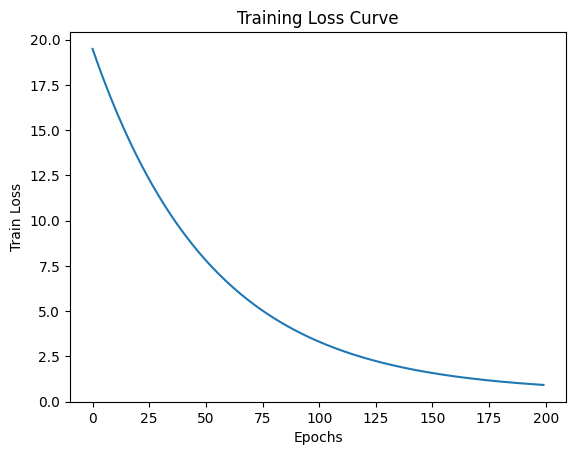

In [121]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

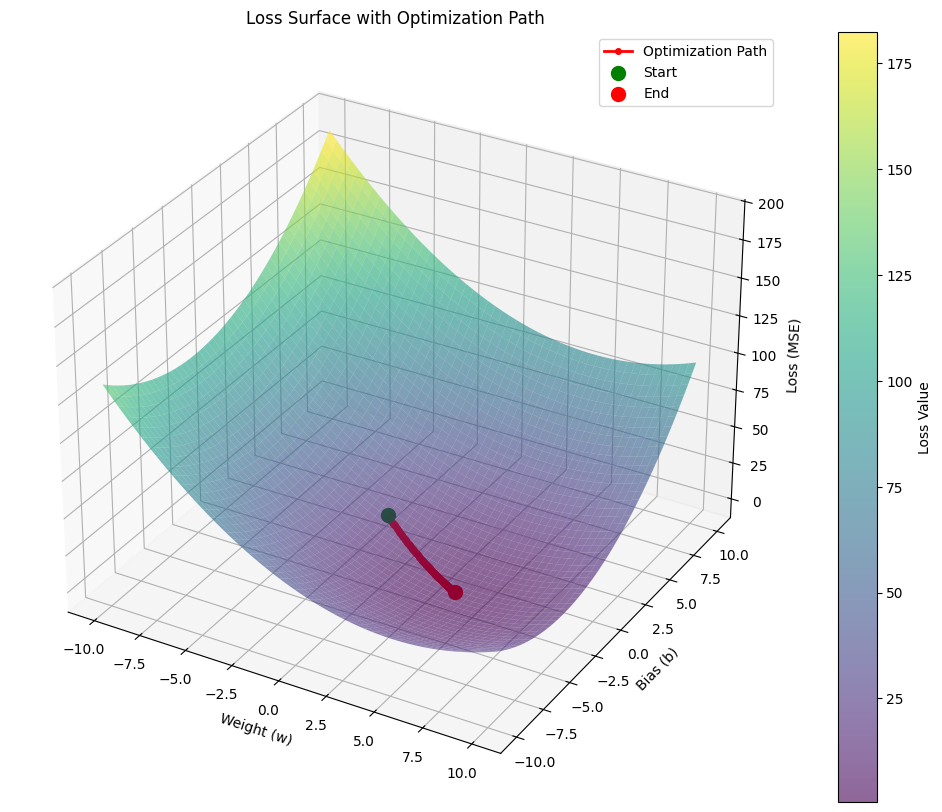

In [80]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

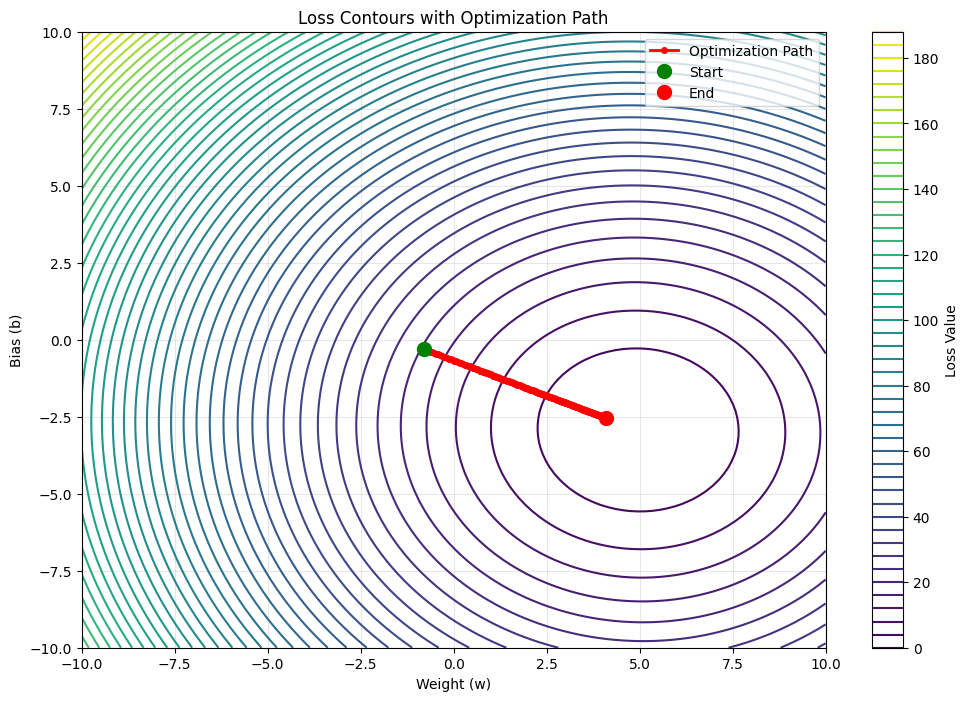

In [81]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [122]:
w_updates[-1], b_updates[-1]

(np.float64(4.097443135922473), np.float64(-2.5419156967007646))

### SGD With Momentum

In [130]:
class SGDWithMomentum:
    def __init__(self, lr, gamma):
        self.lr = lr
        self.v = np.zeros(2)
        self.gamma = gamma

    def update(self, params, grad):
        self.v = self.gamma * self.v + self.lr * grad
        params -= self.v
        return params

In [143]:
w, b = w_og, b_og
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=25, grad_descent_class=SGDWithMomentum(lr=0.01, gamma=0.90))

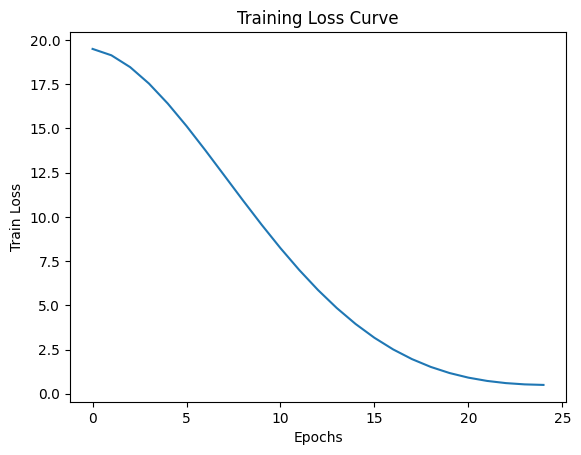

In [144]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

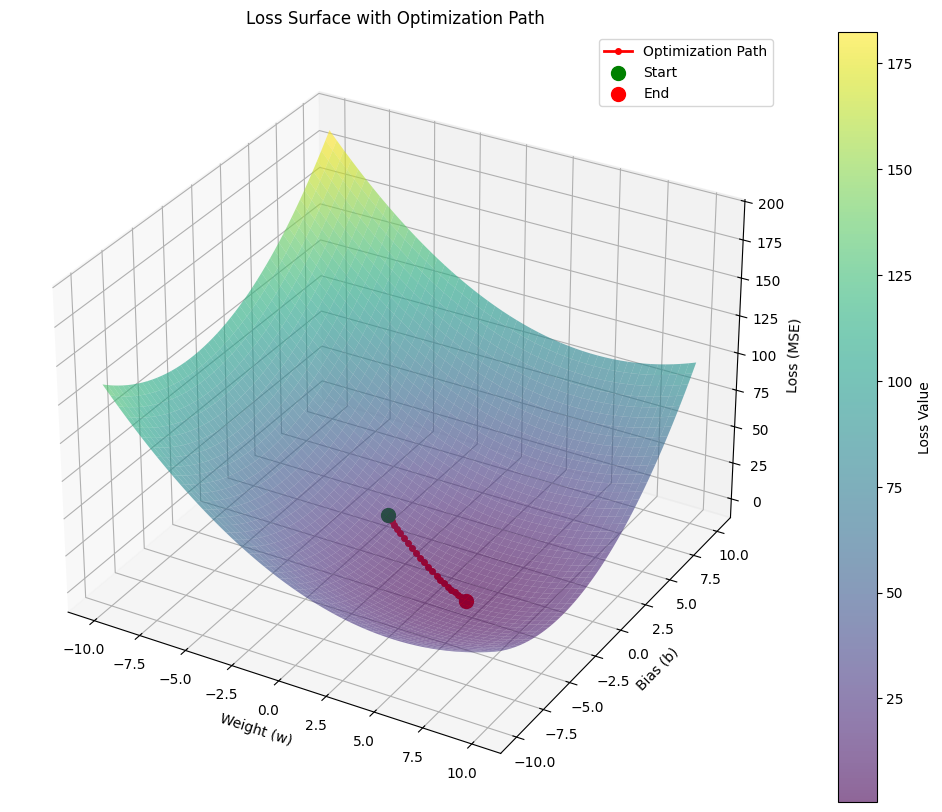

In [133]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

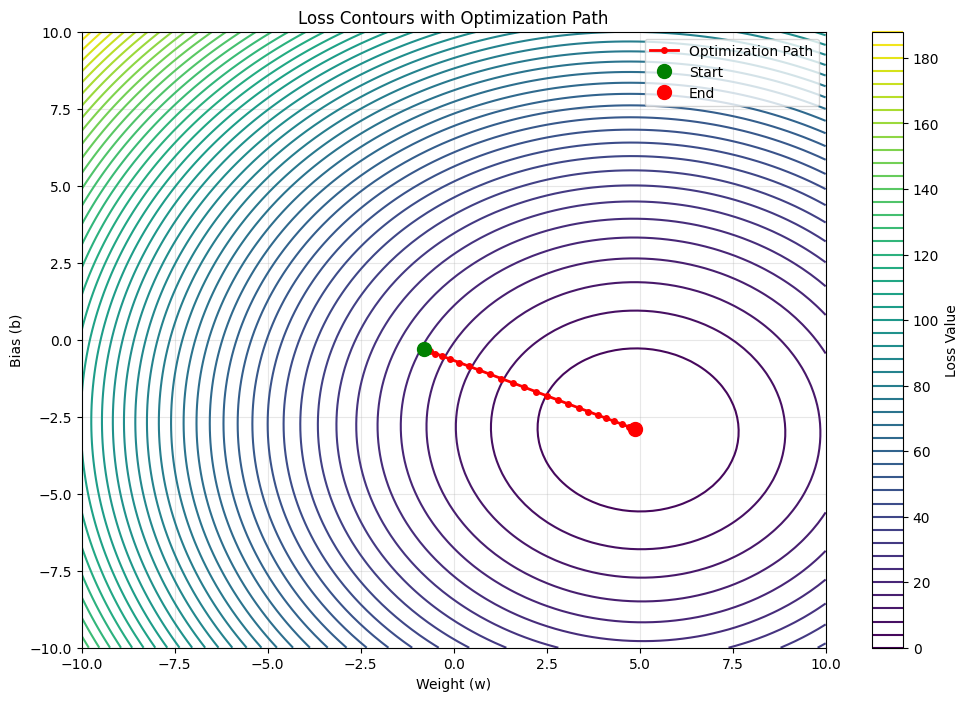

In [134]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [135]:
w_updates[-1], b_updates[-1]

(np.float64(4.883234651609082), np.float64(-2.906190174434779))

In [145]:
loss_values[-1]

np.float64(0.4991019563446208)

### NAG

In [146]:
class NAG:
    def __init__(self, lr, gamma, grad_fn, x_train, y_train):
        self.lr = lr
        self.v = np.zeros(2, dtype=np.float64)
        self.gamma = gamma
        self.grad_fn = grad_fn
        self.x_train = x_train
        self.y_train = y_train

    def update(self, params, grad):
        self.v = self.gamma * self.v + self.lr * self.grad_fn(self.x_train, self.y_train, params[0] - self.gamma * self.v[0], params[1] - self.gamma * self.v[1])
        params -= self.v
        return params

In [147]:
w, b = w_og, b_og
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=25, grad_descent_class=NAG(lr=0.01, gamma=0.90, grad_fn=get_grad, x_train=x_train, y_train=y_train))

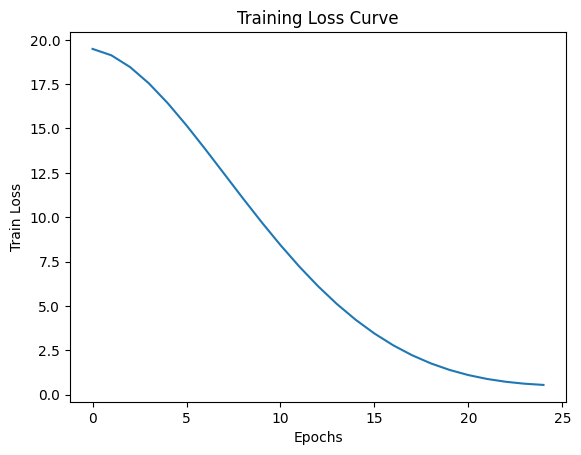

In [148]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

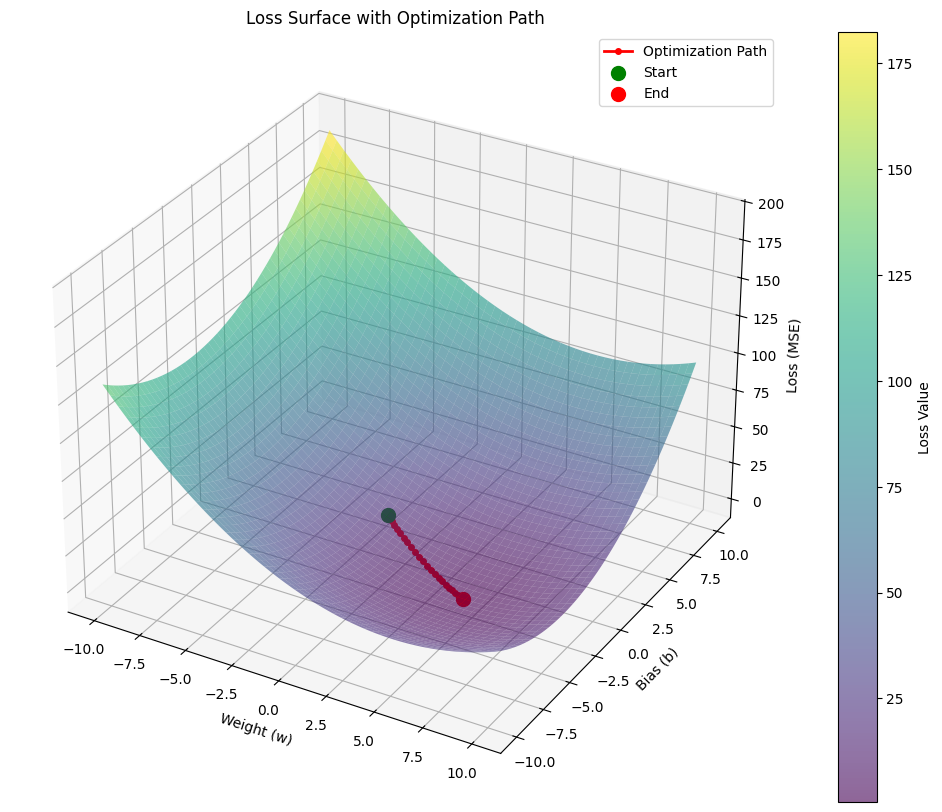

In [149]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

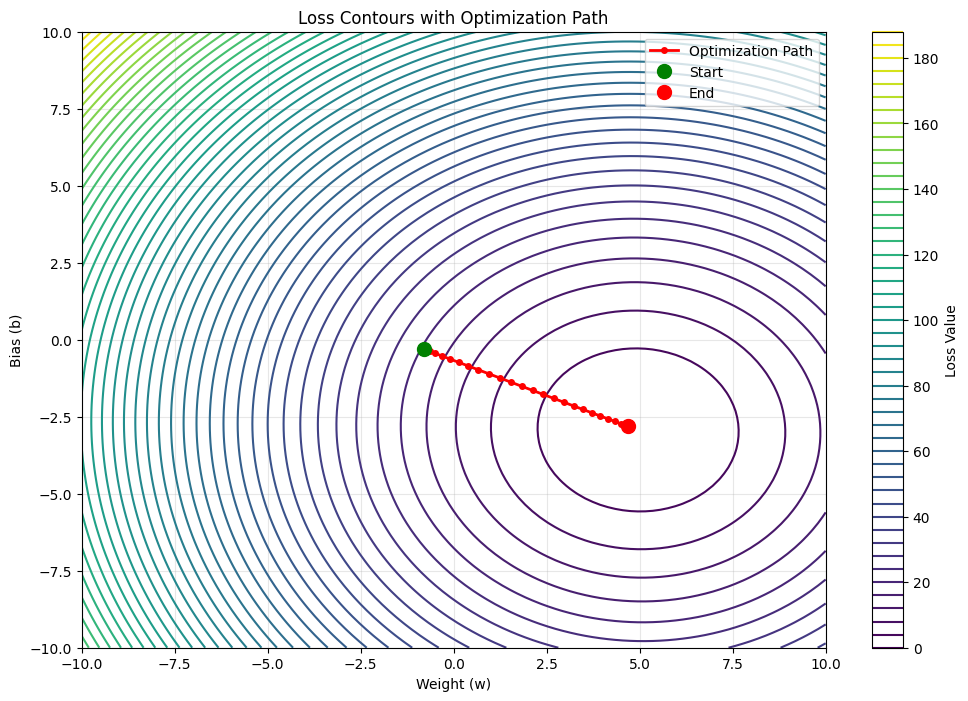

In [150]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [151]:
w_updates[-1], b_updates[-1]

(np.float64(4.6746415323127355), np.float64(-2.8101021054675908))

In [152]:
loss_values[-1]

np.float64(0.5411942753008605)

### AdaGrad

In [198]:
class AdaGrad:
    def __init__(self, lr, epsilon):
        self.lr = lr
        self.epsilon = epsilon
        self.alpha = np.zeros(2, dtype=np.float64)
        self.lr_list = []
    
    def update(self, params, grad):
        self.alpha += grad**2
        lr_scaled = self.lr / np.sqrt(self.alpha + self.epsilon)
        self.lr_list.append(lr_scaled)
        params -= lr_scaled * grad
        return params

In [199]:
w, b = w_og, b_og
optim = AdaGrad(lr=0.01, epsilon=1e-8)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=1000, grad_descent_class=optim)

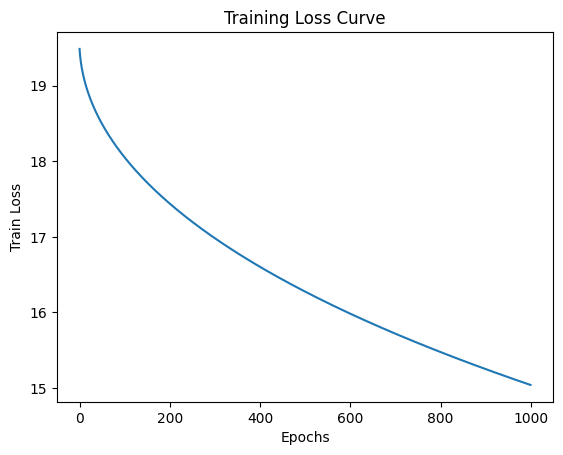

In [200]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

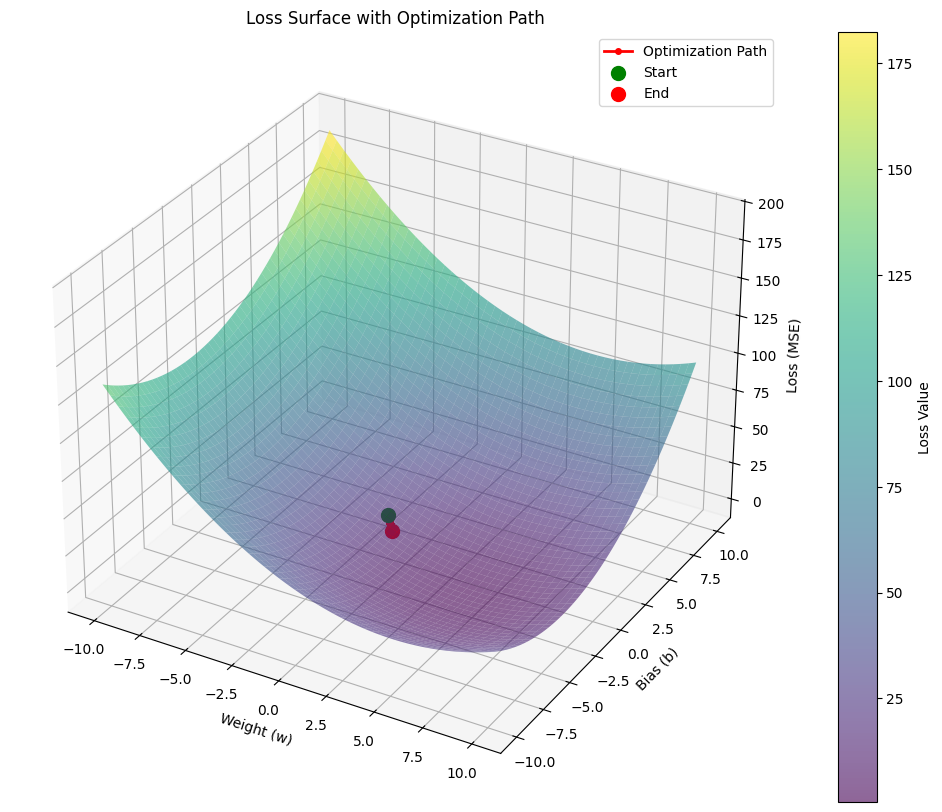

In [201]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

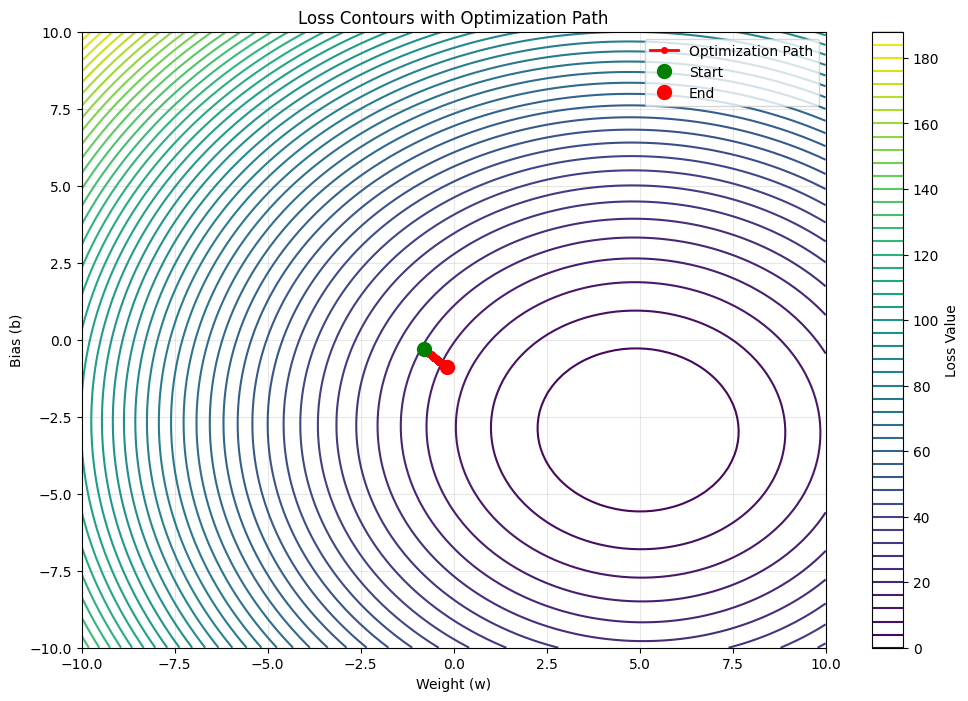

In [202]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [ ]:
w_updates[-1], b_updates[-1]

(np.float64(4.6746415323127355), np.float64(-2.8101021054675908))

In [203]:
loss_values[-1]

np.float64(15.04098340966506)

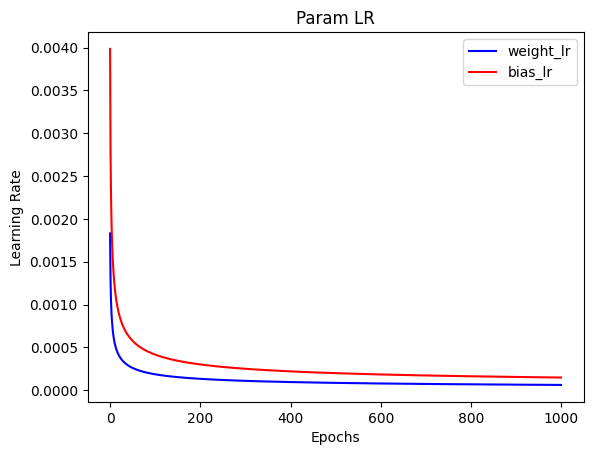

In [204]:
lr_array = np.array(optim.lr_list)

plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

### RMSProp

In [176]:
class RMSProp:
    def __init__(self, lr, epsilon, beta):
        self.lr = lr
        self.epsilon = epsilon
        self.beta = beta
        self.alpha = np.zeros(2, dtype=np.float64)
        self.lr_list = []
    
    def update(self, params, grad):
        self.alpha = self.beta * self.alpha + (1 - self.beta) * grad**2
        lr_scaled = self.lr / np.sqrt(self.alpha + self.epsilon)
        self.lr_list.append(lr_scaled)
        params -= lr_scaled * grad
        return params

In [183]:
w, b = w_og, b_og
optim = RMSProp(lr=0.01, epsilon=1e-8, beta=0.90)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=500, grad_descent_class=optim)

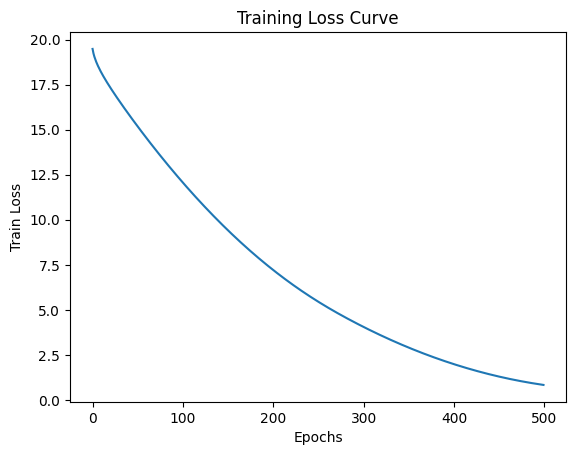

In [184]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

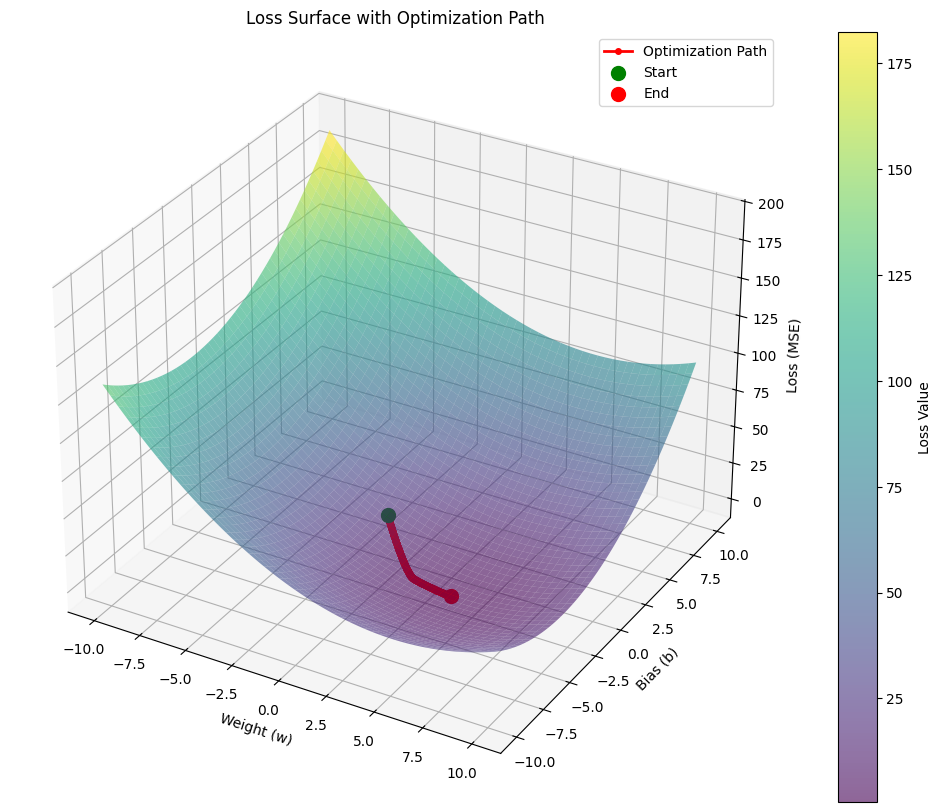

In [185]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

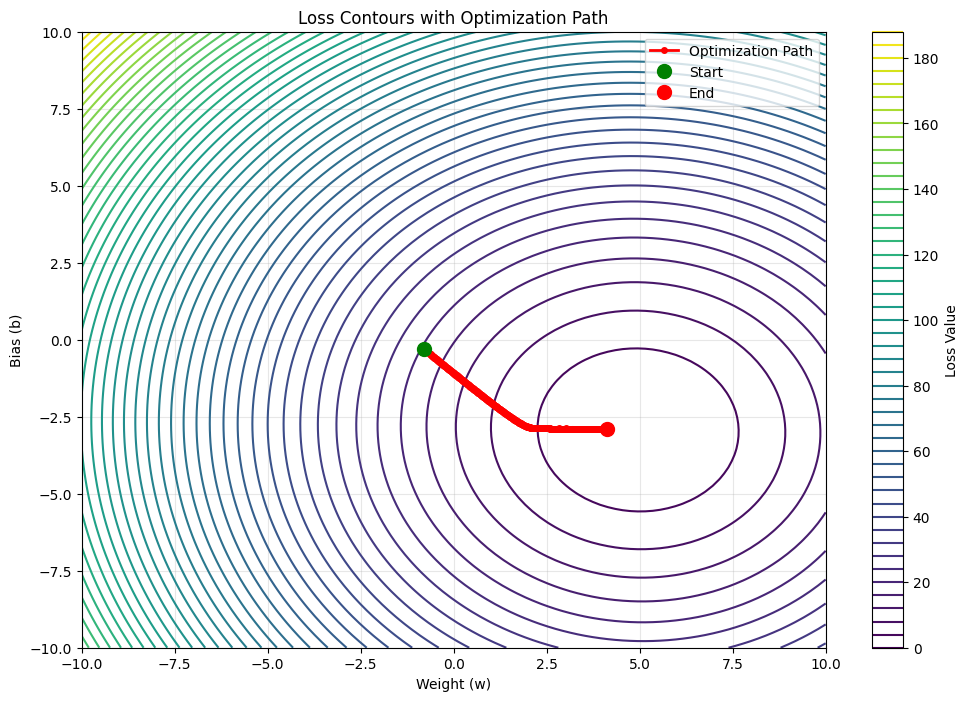

In [186]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [181]:
w_updates[-1], b_updates[-1]

(np.float64(4.122648264137419), np.float64(-2.907122964954426))

In [187]:
loss_values[-1]

np.float64(0.8310596272857754)

In [191]:
lr_array = np.array(optim.lr_list)

In [192]:
lr_array.shape

(500, 2)

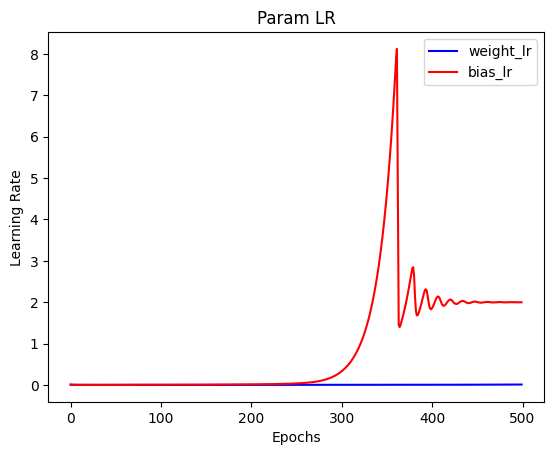

In [194]:
plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

### AdaDelta

In [205]:
class AdaDelta:
    def __init__(self, epsilon, beta):
        self.epsilon = epsilon
        self.beta = beta
        self.alpha = np.zeros(2, dtype=np.float64)
        self.delta_x = np.zeros(2, dtype=np.float64)
        self.lr_list = []
    
    def update(self, params, grad):
        self.alpha = self.beta * self.alpha + (1 - self.beta) * grad**2
        lr_scaled = np.sqrt((self.delta_x + self.epsilon) / (self.alpha + self.epsilon))
        self.lr_list.append(lr_scaled)

        delta_theta = lr_scaled * grad
        self.delta_x = self.beta * self.delta_x + (1 - self.beta) * delta_theta**2
        params -= delta_theta
        
        return params

In [211]:
w, b = w_og, b_og
optim = AdaDelta(epsilon=1e-8, beta=0.99)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=500, grad_descent_class=optim)

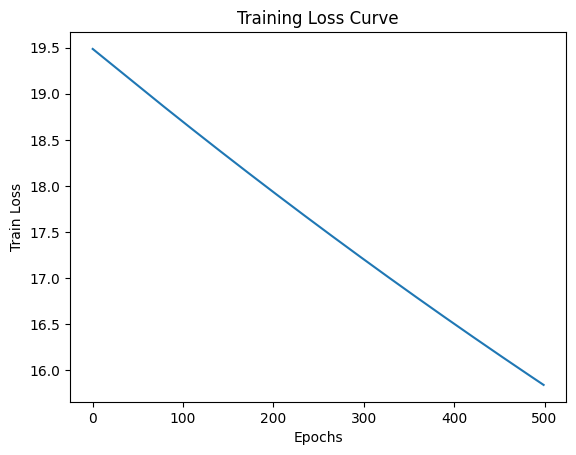

In [212]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

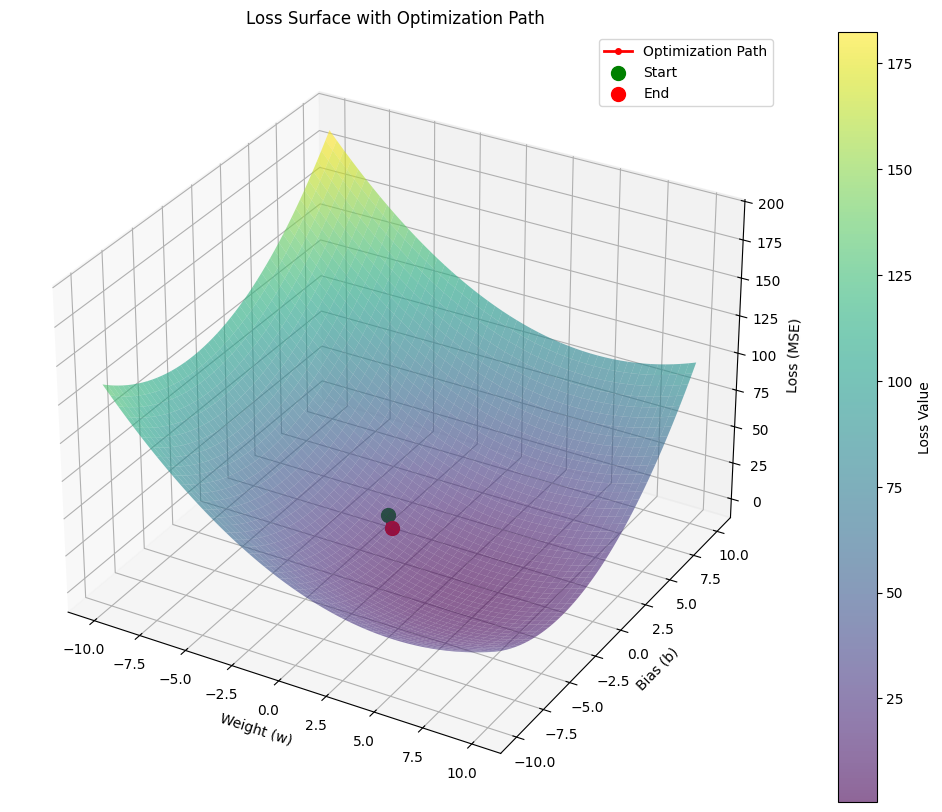

In [213]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

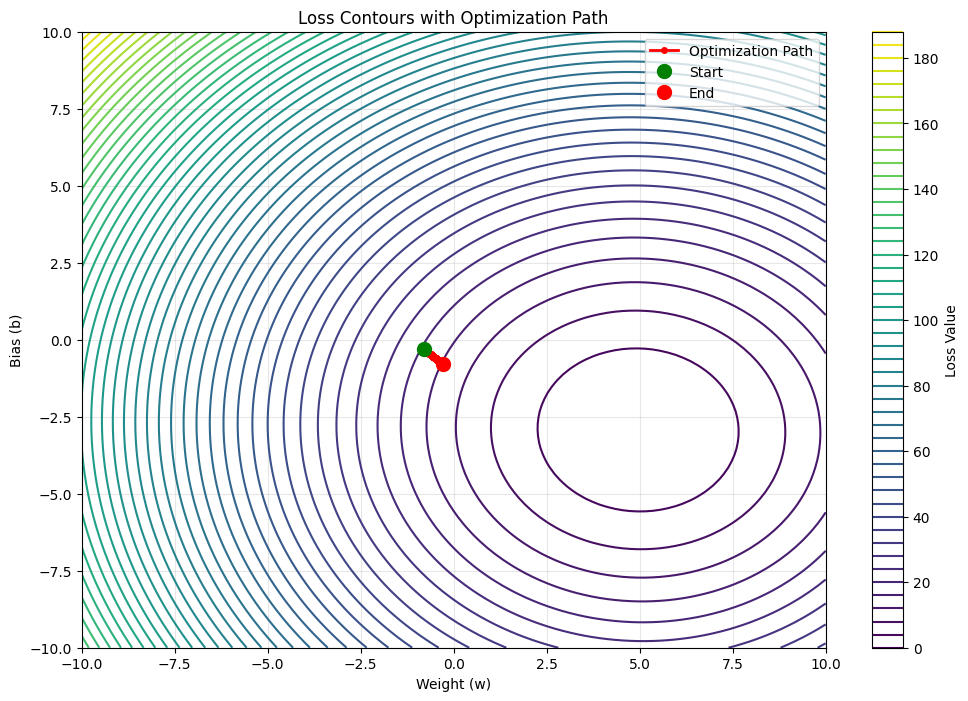

In [214]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [215]:
w_updates[-1], b_updates[-1]

(np.float64(-0.29916575367303594), np.float64(-0.7757835552281044))

In [216]:
loss_values[-1]

np.float64(15.840777541676522)

In [217]:
lr_array = np.array(optim.lr_list)

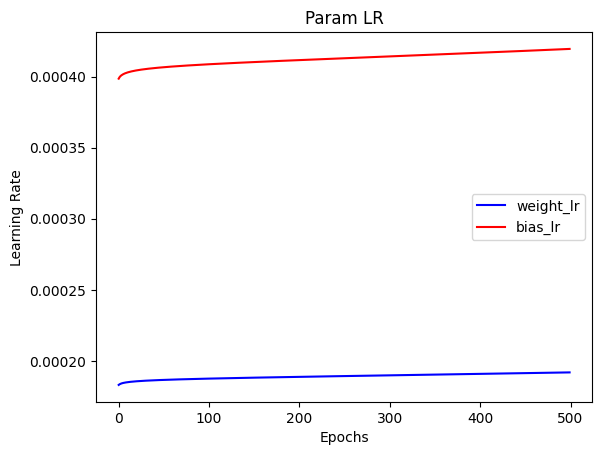

In [218]:
plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

### Adam

In [230]:
class Adam:
    def __init__(self, lr, epsilon, beta1, beta2):
        self.lr = lr
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = np.zeros(2, dtype=np.float64)
        self.v = np.zeros(2, dtype=np.float64)
        self.t = 1
        self.lr_list = []
    
    def update(self, params, grad):
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.t += 1

        lr_scaled = self.lr / (np.sqrt(v_hat) + self.epsilon)
        self.lr_list.append(lr_scaled)

        params -= lr_scaled * m_hat
        
        return params

In [263]:
w, b = w_og, b_og
optim = Adam(lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=1000, grad_descent_class=optim)

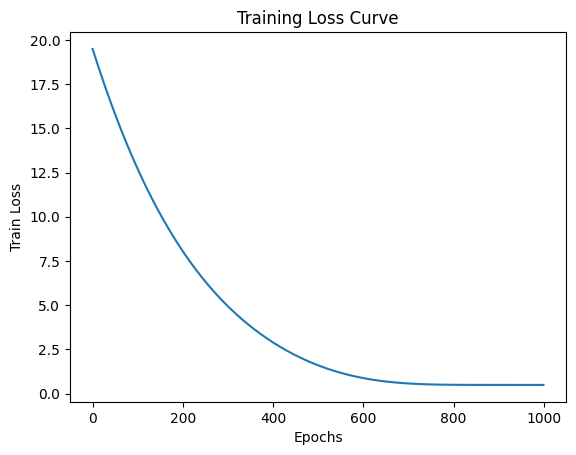

In [264]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

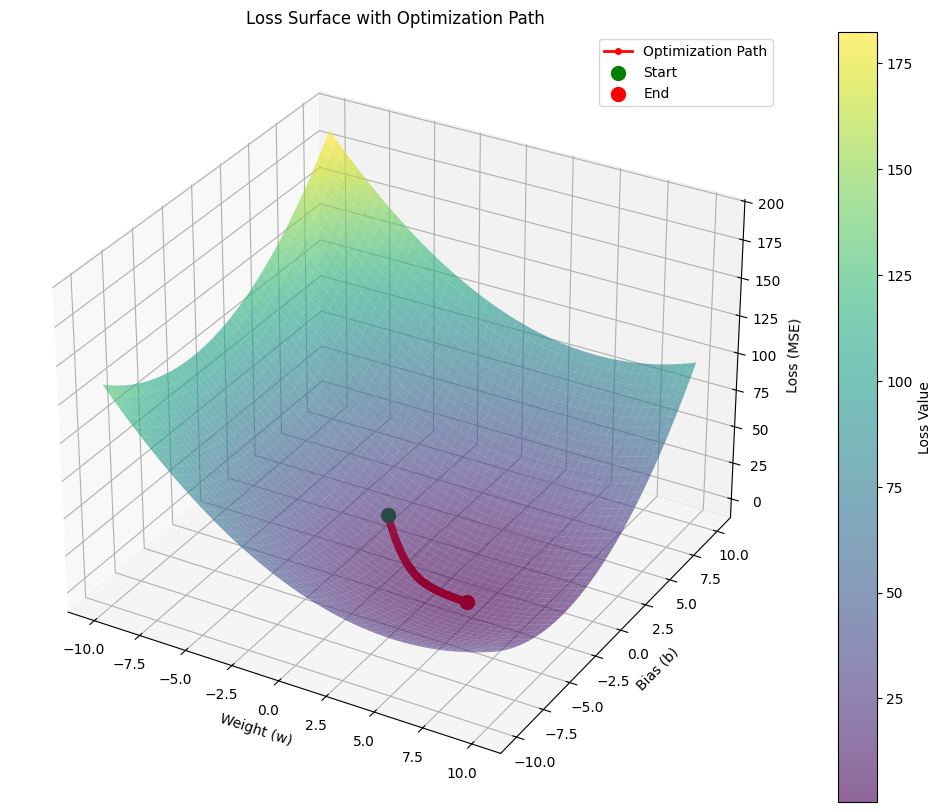

In [265]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

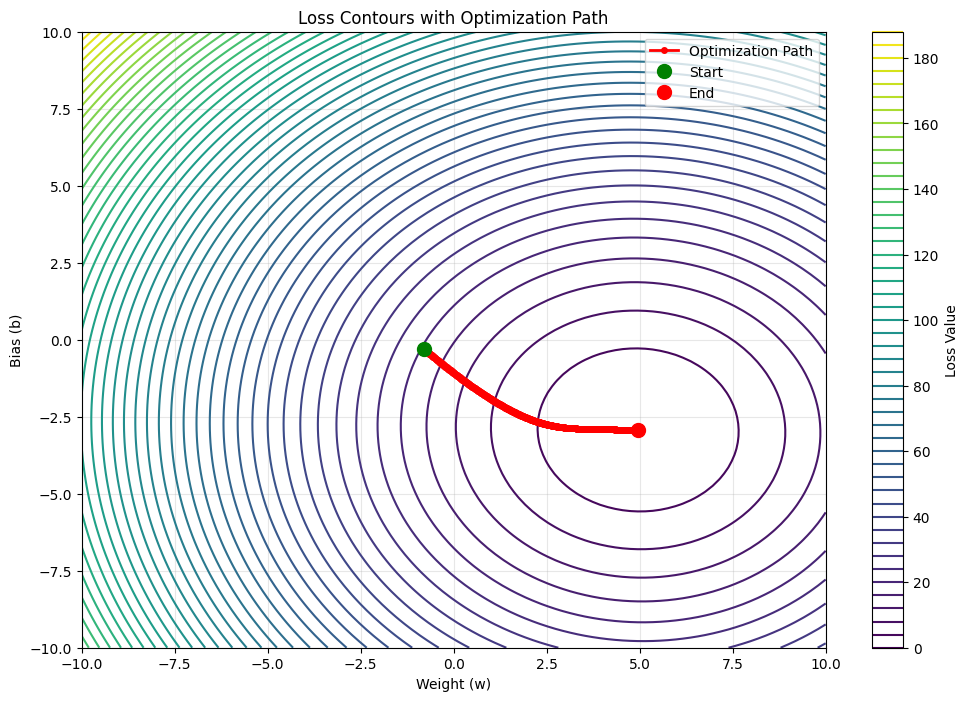

In [266]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [267]:
w_updates[-1], b_updates[-1]

(np.float64(4.958835980413818), np.float64(-2.9283679500557853))

In [268]:
loss_values[-1]

np.float64(0.49614904644692265)

In [269]:
lr_array = np.array(optim.lr_list)

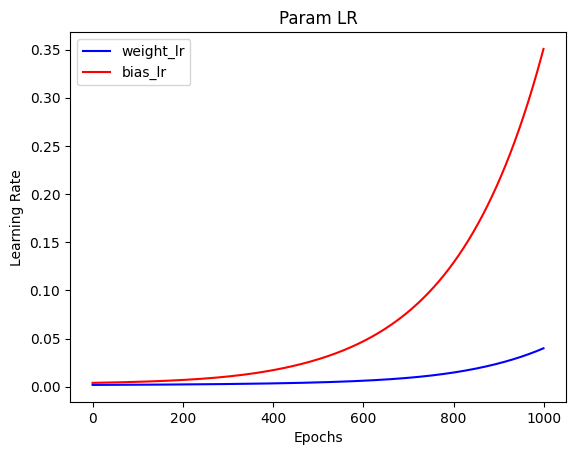

In [270]:
plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

### AdaMax

In [271]:
class AdaMax:
    def __init__(self, lr, epsilon, beta1, beta2):
        self.lr = lr
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = np.zeros(2, dtype=np.float64)
        self.v = np.zeros(2, dtype=np.float64)
        self.t = 1
        self.lr_list = []
    
    def update(self, params, grad):
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = np.maximum(self.beta2 * self.v, np.abs(grad))

        m_hat = self.m / (1 - self.beta1**self.t)
        self.t += 1

        lr_scaled = self.lr / self.v
        self.lr_list.append(lr_scaled)

        params -= lr_scaled * m_hat
        
        return params

In [272]:
w, b = w_og, b_og
optim = AdaMax(lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=1000, grad_descent_class=optim)

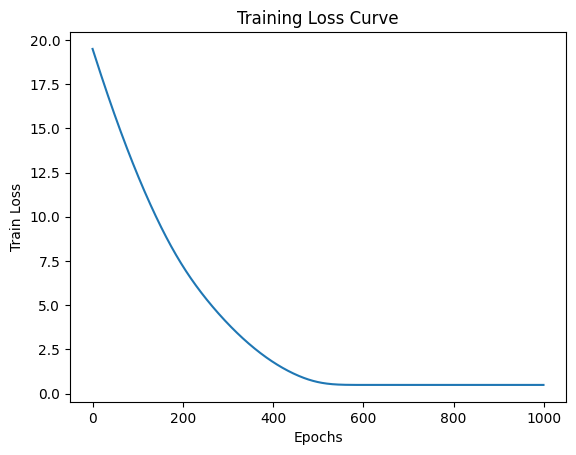

In [273]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

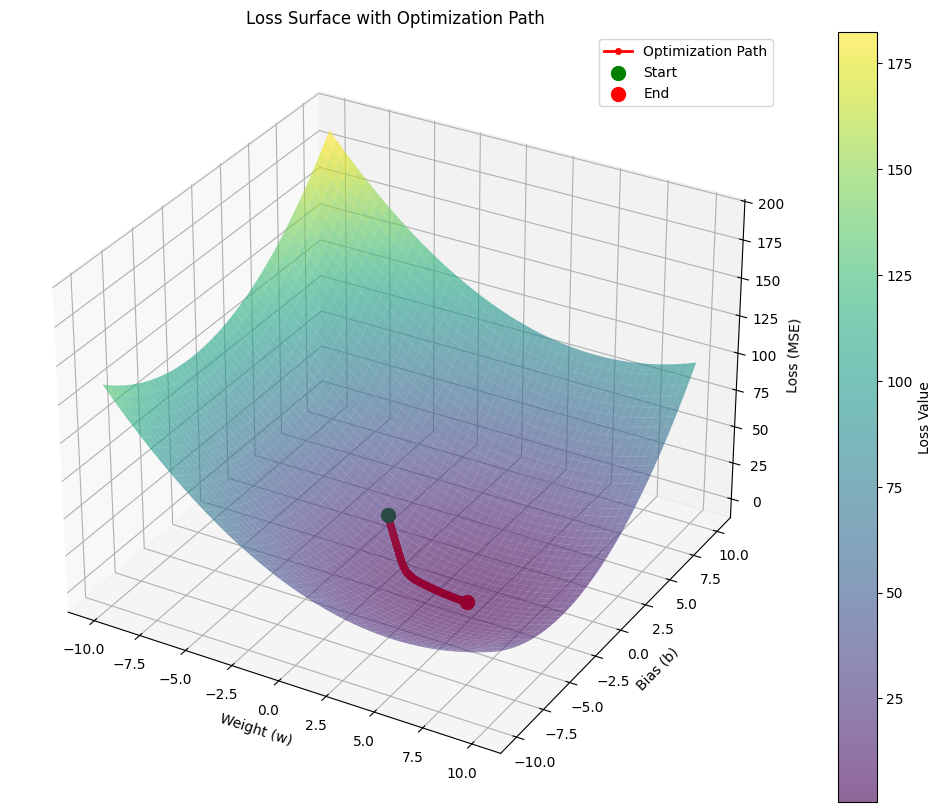

In [274]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

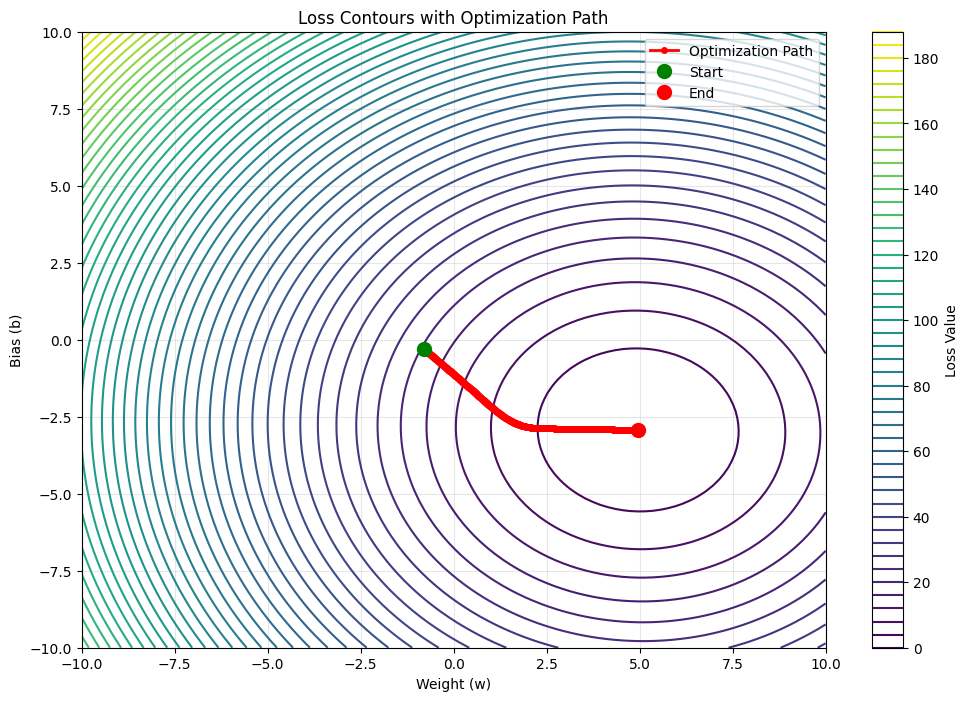

In [275]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [276]:
w_updates[-1], b_updates[-1]

(np.float64(4.958847662572562), np.float64(-2.928363910457317))

In [277]:
loss_values[-1]

np.float64(0.49614904639081625)

In [278]:
lr_array = np.array(optim.lr_list)

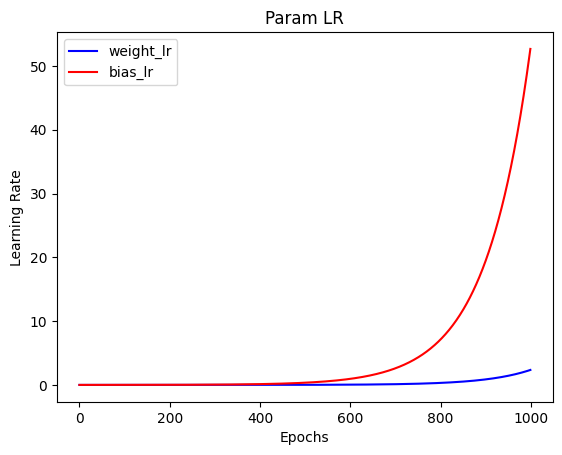

In [279]:
plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

### NADAM

In [296]:
class NADAM:
    def __init__(self, lr, epsilon, beta1, beta2):
        self.lr = lr
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = np.zeros(2, dtype=np.float64)
        self.v = np.zeros(2, dtype=np.float64)
        self.t = 1
        self.lr_list = []
    
    def update(self, params, grad):
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)

        lr_scaled = self.lr / (np.sqrt(v_hat) + self.epsilon)
        self.lr_list.append(lr_scaled)

        params -= lr_scaled * (self.beta1 * m_hat + ((1 - self.beta1)/(1 - self.beta1 ** (self.t))) * grad)
        # print(lr_scaled*np.abs(m_hat-(self.beta1 * m_hat + ((1 - self.beta1)/(1 - self.beta1 ** (self.t))) * grad)))
        self.t += 1
        
        return params

In [297]:
w, b = w_og, b_og
optim = NADAM(lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99)
loss_values, w_updates, b_updates = train(x_train, y_train, w, b, n_epoch=1000, grad_descent_class=optim)

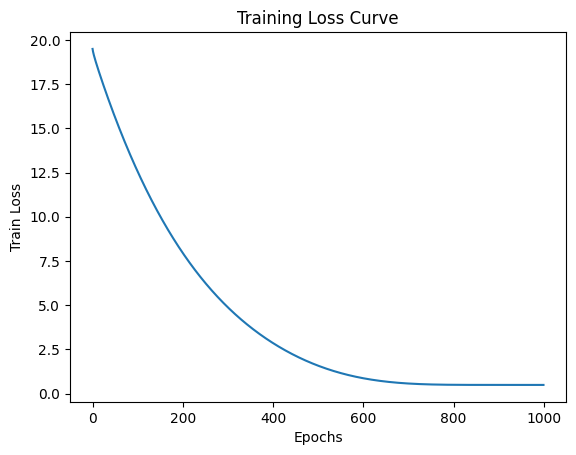

In [298]:
plt.plot(range(len(loss_values)), loss_values)  # Connect points with red dashed line
# plt.scatter(range(len(loss_values)), loss_values, c='red', s=20)

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

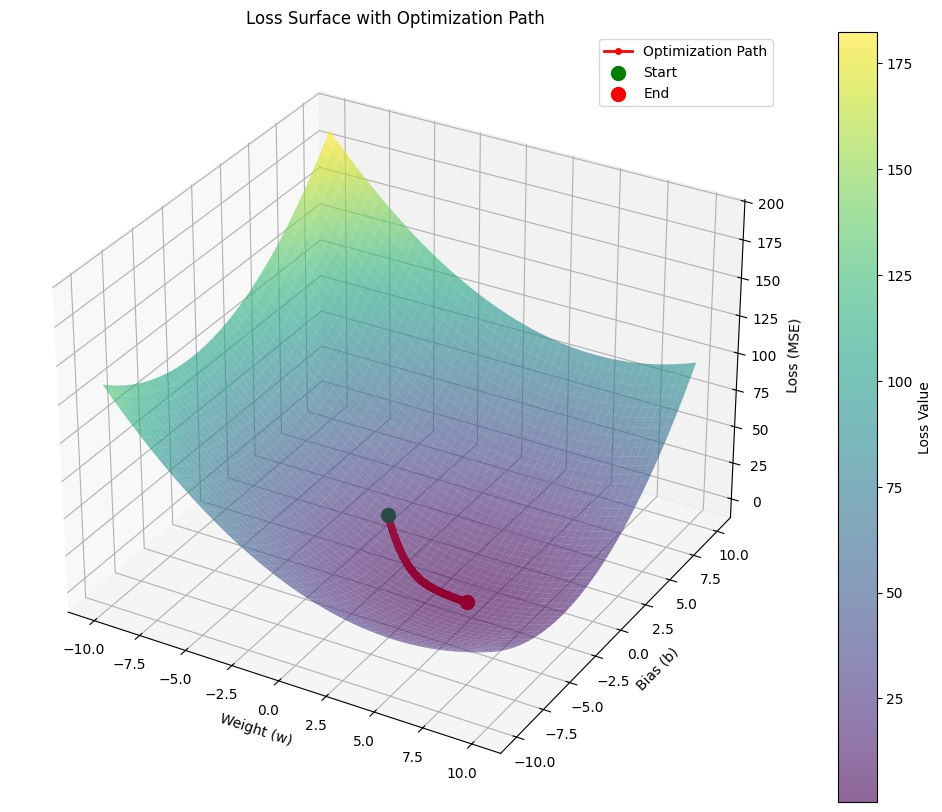

In [299]:
plot_loss_surface_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

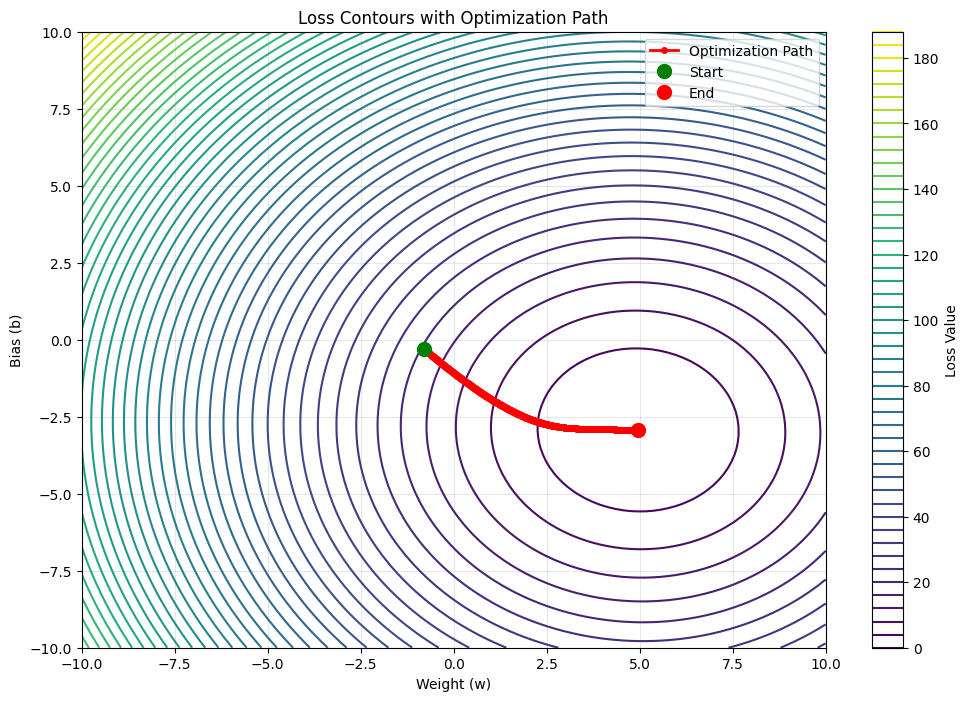

In [300]:
plot_loss_contour_with_path(x_train, y_train, get_loss, path_points=[(w_updates[i], b_updates[i]) for i in range(len(w_updates))])

In [301]:
w_updates[-1], b_updates[-1]

(np.float64(4.958800311028947), np.float64(-2.9283671771702746))

In [302]:
loss_values[-1]

np.float64(0.49614904745532556)

In [303]:
lr_array = np.array(optim.lr_list)

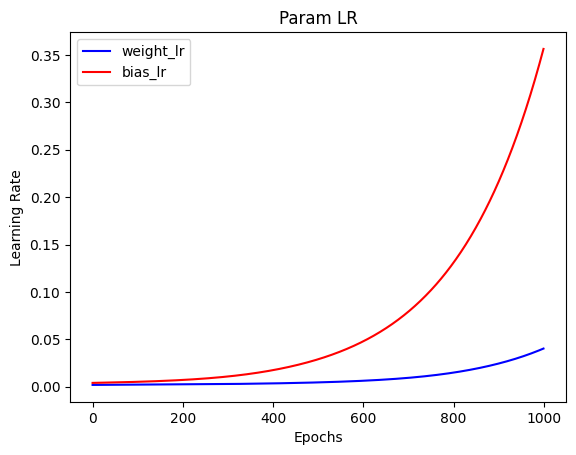

In [304]:
plt.plot(range(len(lr_array)), lr_array[:, 0], label='weight_lr', color='blue')  
plt.plot(range(len(lr_array)), lr_array[:, 1], label='bias_lr', color='red')  

plt.title('Param LR')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()